<a href="https://colab.research.google.com/github/pranabkb/AIML-Course/blob/main/Introduction%20to%20Neural%20Networks/Project%207%20Deep%20Neural%20Networks%20Bank%20Churn%20Prediction/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description
### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

* **CustomerId:** Unique ID which is assigned to each customer
* **Surname:** Last name of the customer 
* **CreditScore:** It defines the credit history of the customer.  
* **Geography:** A customer’s location
* **Gender:** It defines the Gender of the customer   
* **Age:** Age of the customer     
* **Tenure:** Number of years for which the customer has been with the bank
* **NumOfProducts:** It refers to the number of products that a customer has purchased through the bank.
* **Balance:** Account balance
* **HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not.
* **EstimatedSalary:** Estimated salary 
* **isActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* **Excited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )
                    1=Yes ( Customer left the bank )

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Introductory Steps**

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

### Loading the Data

In [3]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/bank.csv')

In [4]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Data Overview

In [5]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.


In [8]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

No duplicate row found in the dataframe

In [9]:
# Let's check for missing values in the data
Data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing value found

In [10]:
Data["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* 80% customers didn't leave the bank and 20% customers leave the bank.

In [11]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* `RowNumber`:  RowNumber range from 1 to 10000.
* `CustomerId`: CustomerId range from 15565701 to 15815690.
* `CreditScore`: Average is 650.52, Credit Score range from 350 to 850.
* `Age`: Average is 38.9, Age range from 18 to 92.
* `Tenure`: Average is 5, Tenure range from 0 to 10.
* `NumOfProducts`:  Average is 1, NumOfProducts range from 0 to 4.
* `Balance`: Average is 76485.89, Balance range from 0 to 250898.09.
* `HasCrCard`: HasCrCard range from 0 to 1.
* `IsActiveMember`: IsActiveMember range from 0 to 1.
* `EstimatedSalary`: Average is 100090.20, EstimatedSalary range from 11.58 to 199992.48.
* `Excited`: Excited range from 0 to 1.

In [12]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Each value of the column 'RowNumber' and 'CustomerId' is a unique identifier for Bank Customers. Hence we can drop this column as it will not add any predictive power or value to the model.
* The 'Surname' column has 2932 unique categories.

In [13]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


* The 'Surname' column has 2932 unique categories, and the surname with the highest number of customers is Smith.
* Over 50% of the bank customers in this dataset are from France.
* Over 50% of the bank customers are male.

### Data Pre-processing

In [14]:
# ID columns consists of uniques ID for customers and hence will not add value to the modeling
Data.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

## **EDA**

### Univariate Analysis

In [15]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
Data.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

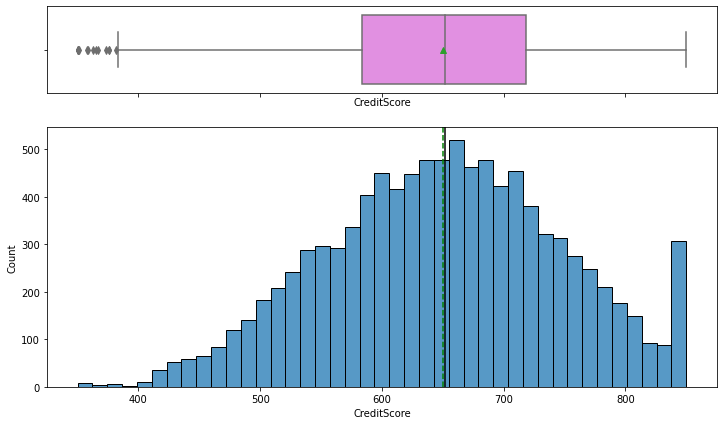

In [17]:
histogram_boxplot(Data, "CreditScore")

* **CreditScore** is well distributed and median is 652. Also has few outlier.

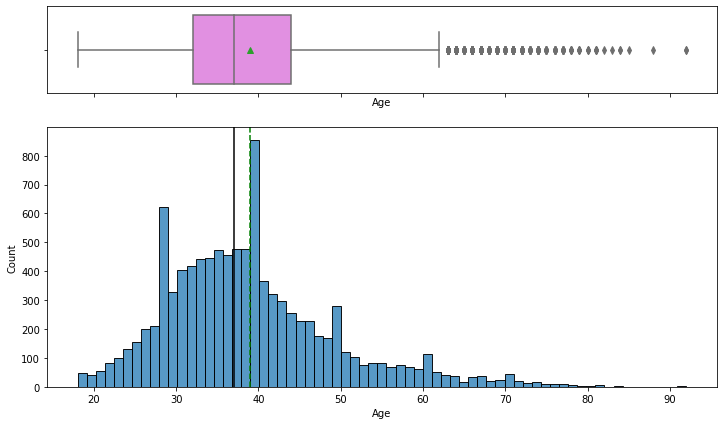

In [18]:
histogram_boxplot(Data, "Age")

* The distribution of **Age** is right-skewed with a median is 37. Also has lots of outlier.

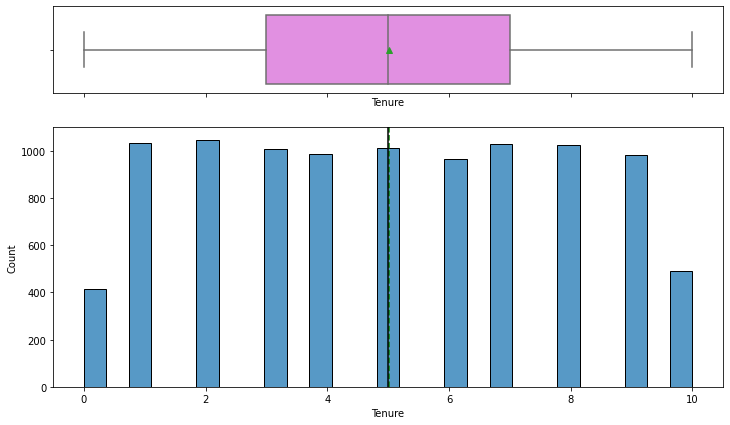

In [19]:
histogram_boxplot(Data, "Tenure")

* The distribution of **Tenure** is well distributed with a median is 5.

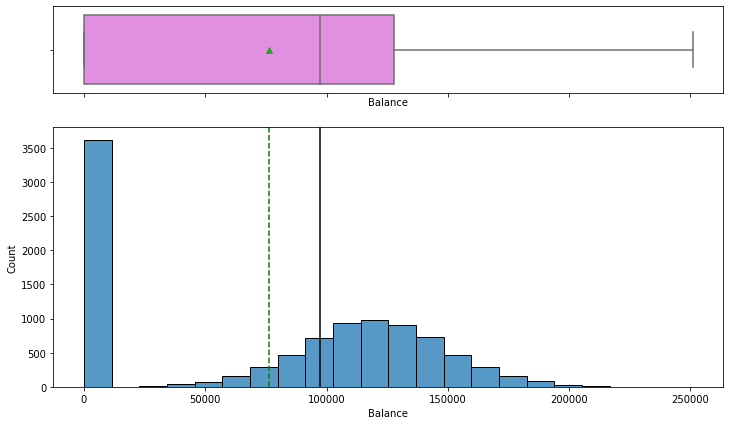

In [20]:
histogram_boxplot(Data, "Balance")

* The distribution of **Balance** is heavily right-skewed with a median is 97198.54. Maximum customers has 0 balance.

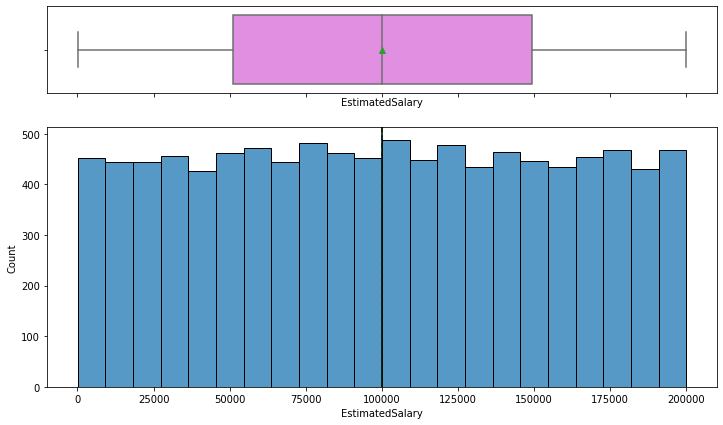

In [21]:
histogram_boxplot(Data, "EstimatedSalary")

* **EstimatedSalary** is well distributed with a median is 100193.90.

In [22]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
#labeled_barplot(Data, "Surname")

* There are far more males in this dataset in comparison to females. 
* Over 90% of this dataset is male, representing a highly gender-skewed dataset. This could be a limitation with respect to implementing this model in the real world, since gender balance is highly important to create machine learning models that are practically implemented on datasets related to people.

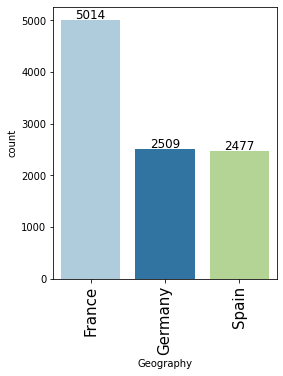

In [24]:
labeled_barplot(Data, "Geography")

* Most of the customers are from France (~50%).
* Germany and Spain almost has same customers. 

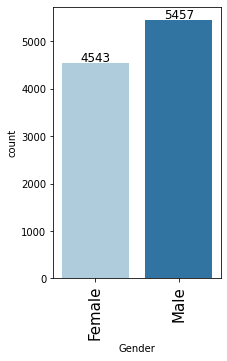

In [25]:
labeled_barplot(Data, "Gender")

* ~54% are Male and ~45% are Female.

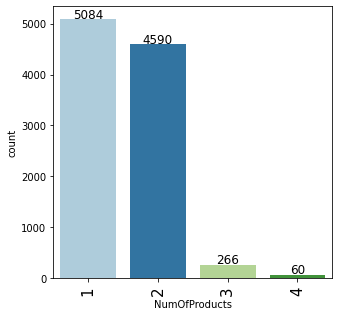

In [26]:
labeled_barplot(Data, "NumOfProducts")



*   ~50% has 1 Product
*   ~46% has 2 Products



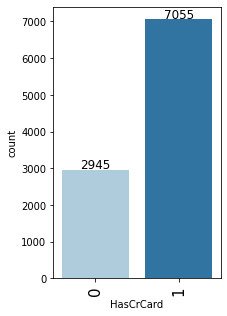

In [27]:
labeled_barplot(Data, "HasCrCard")



*   More than 70% has Card



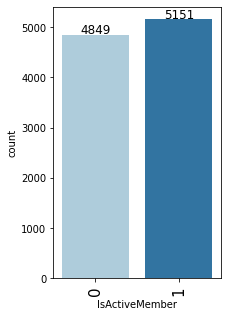

In [28]:
labeled_barplot(Data, "IsActiveMember")

* ~51% are Active Members

0    7963
1    2037
Name: Exited, dtype: int64


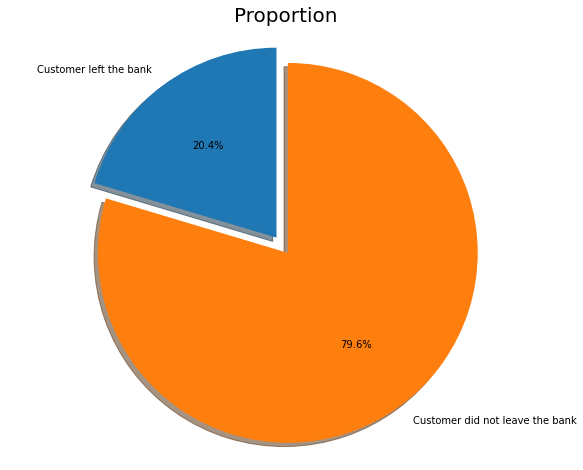

In [29]:
print(Data.Exited.value_counts())
labels = 'Customer left the bank', 'Customer did not leave the bank'
sizes = [Data.Exited[Data['Exited']==1].count(),Data.Exited[Data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~20% of the customers in this dataset left the bank.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

### Bivariate Analysis

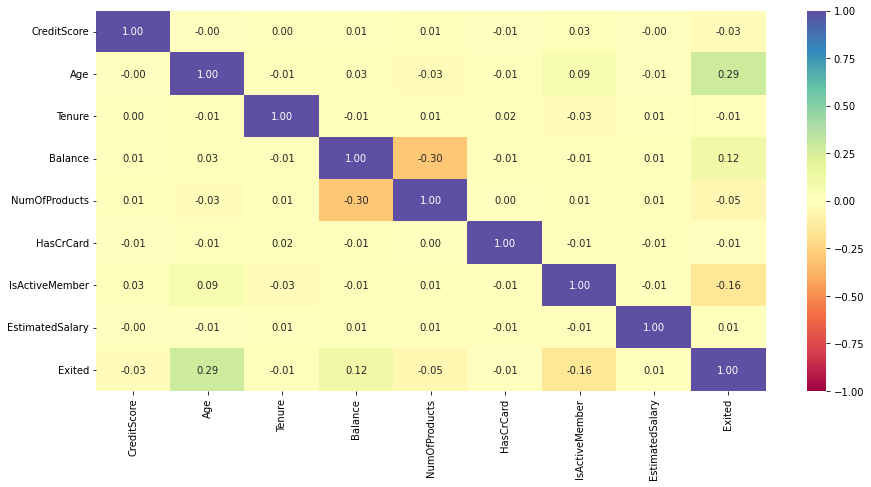

In [30]:
# selecting numerical columns
num_col = Data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(Data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* No correlation.



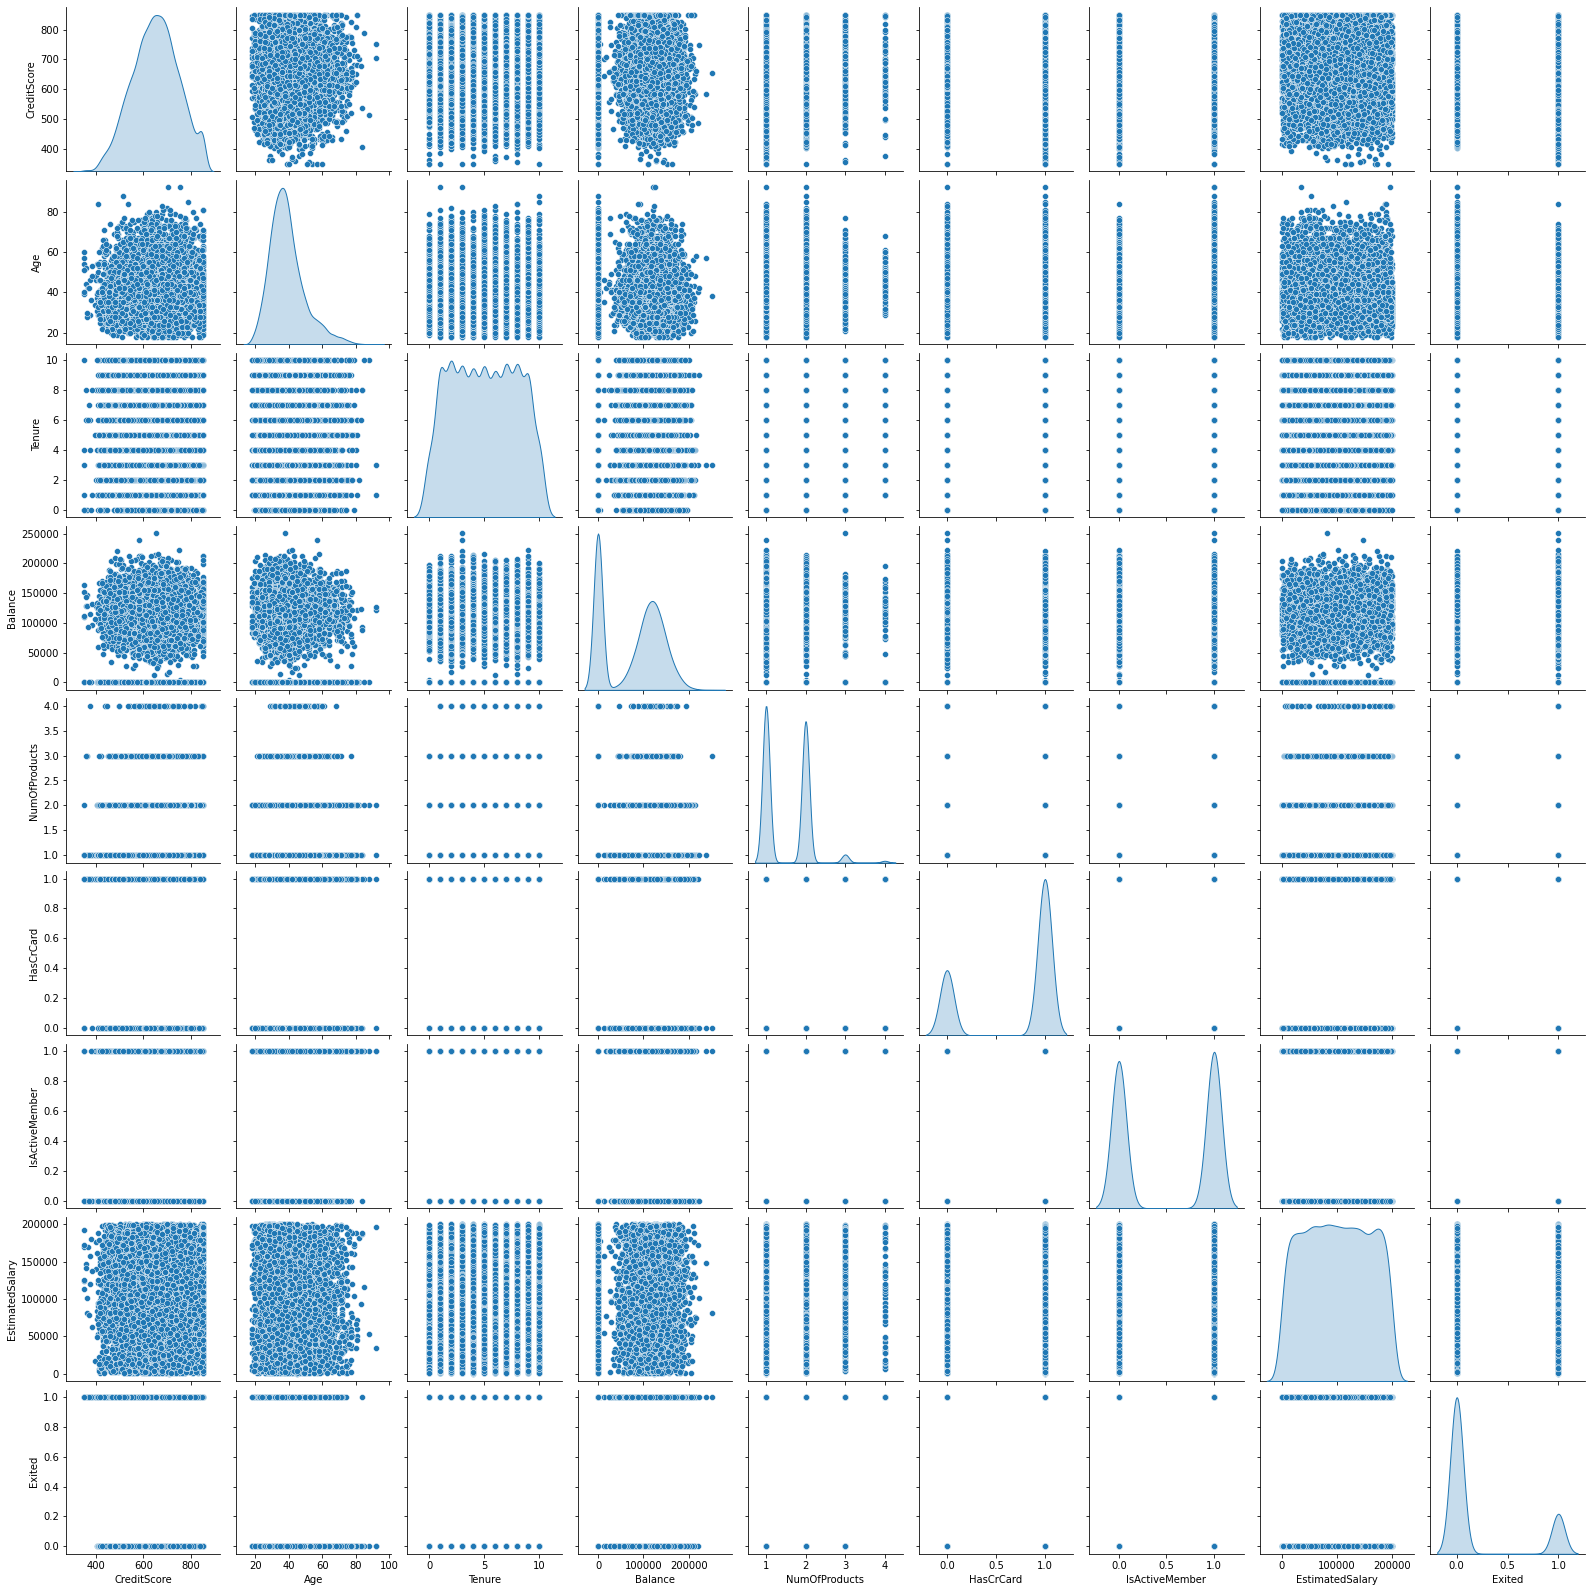

In [31]:
sns.pairplot(data=Data[num_col], diag_kind="kde")
plt.show()

In [32]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

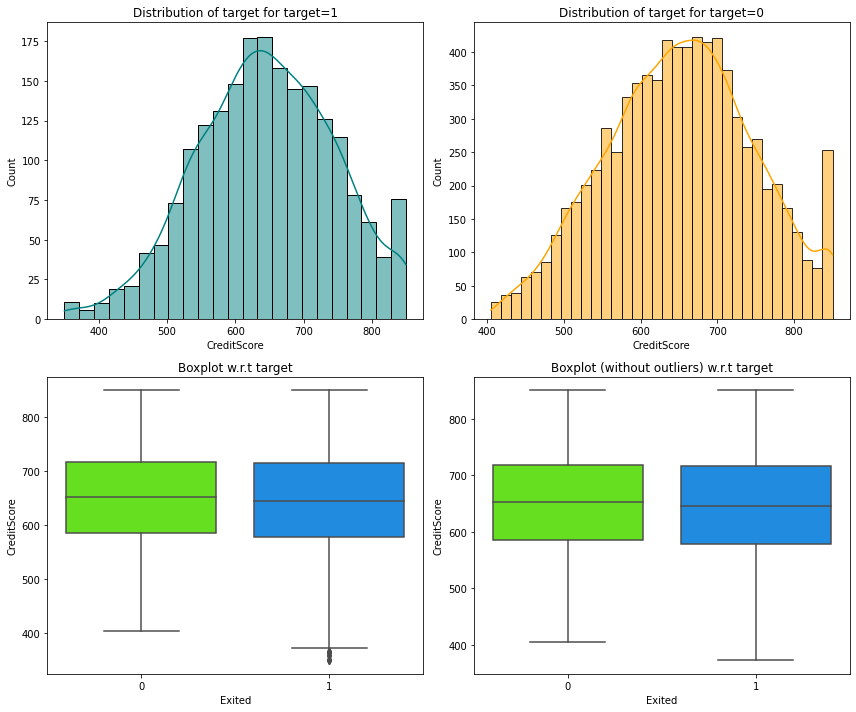

In [33]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

* CreditScore distribution are same for both type of customers

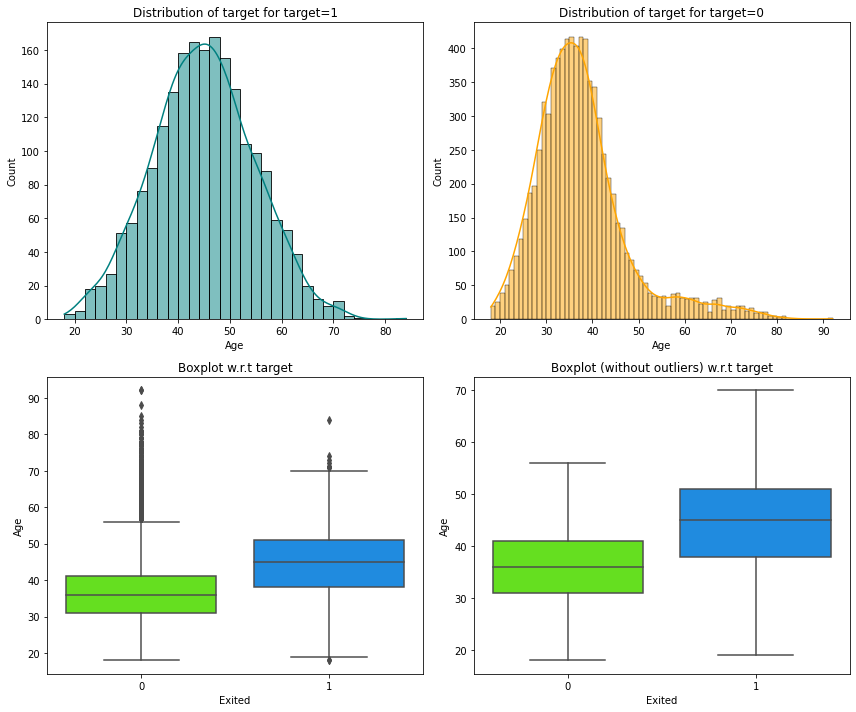

In [34]:
distribution_plot_wrt_target(Data, "Age", "Exited")

* We observe from the distribution of the Age that more aging customers left the bank.

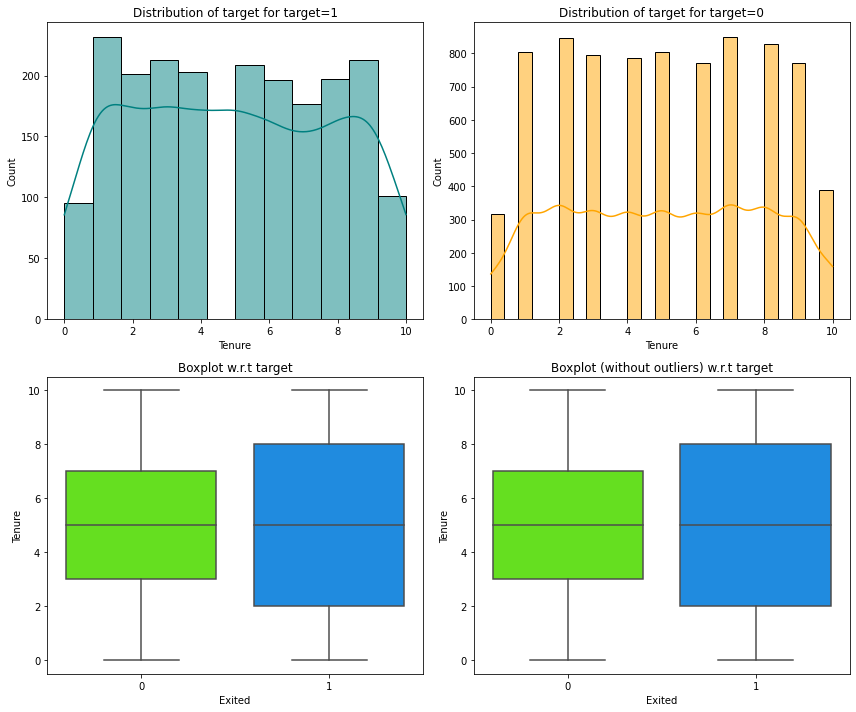

In [35]:
distribution_plot_wrt_target(Data, "Tenure", "Exited")

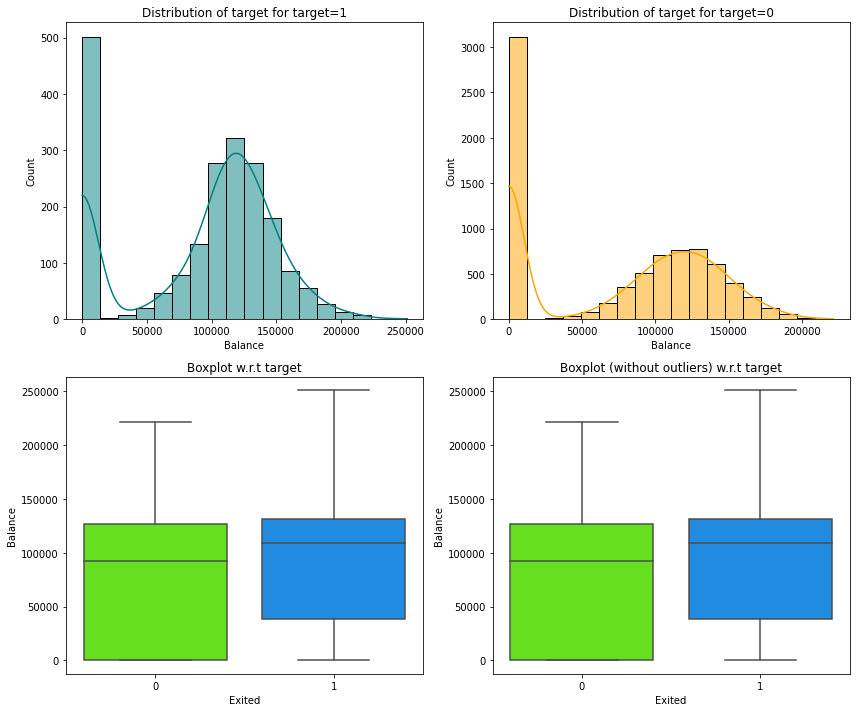

In [36]:
distribution_plot_wrt_target(Data, "Balance", "Exited")

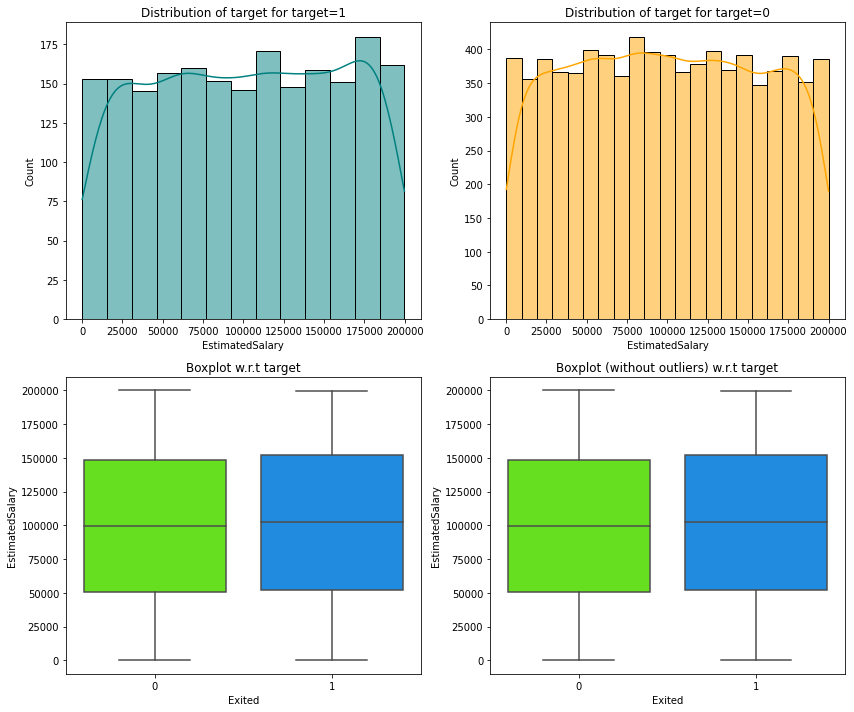

In [37]:
distribution_plot_wrt_target(Data, "EstimatedSalary", "Exited")

In [38]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


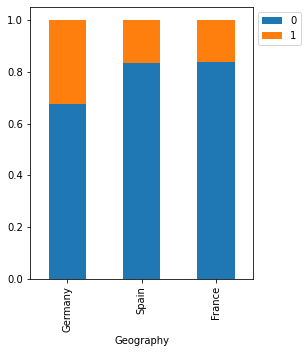

In [39]:
stacked_barplot(Data, "Geography", "Exited")

* More percentage of customers from Germany left the bank
* From Spain and France, percentage of customers left the bank are same

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


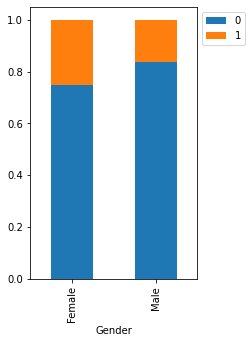

In [40]:
stacked_barplot(Data, "Gender", "Exited")

* From the above plot, we see that Female customers are most likely to left bank.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


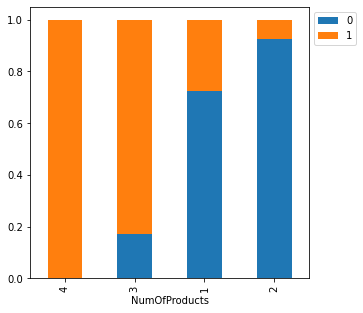

In [41]:
stacked_barplot(Data, "NumOfProducts", "Exited")

* 4 and 3 products customers mostly left the bank.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


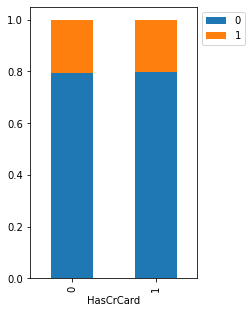

In [42]:
stacked_barplot(Data, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


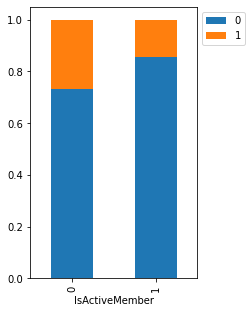

In [43]:
stacked_barplot(Data, "IsActiveMember", "Exited")

* Mostly inactive members left the bank

In [44]:
###Dropping these columns as they will not add value to the modeling
Data.drop(['Surname'], axis=1, inplace=True)

### Data Preprocessing

In [45]:
## Separating Independent and Dependent Columns
X = Data.drop(['Exited'],axis=1)
Y = Data[['Exited']]

In [46]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [47]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 35,stratify = Y)

In [48]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
------------------------------
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


### Encoding Categorical Columns

* We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder_GG = LabelEncoder()
X_train['Geography']= labelencoder_GG.fit_transform(X_train['Geography'])
X_test['Geography']= labelencoder_GG.transform(X_test['Geography'])

In [50]:
labelencoder_GN = LabelEncoder()
X_train['Gender'] =  labelencoder_GN.fit_transform(X_train['Gender'])
X_test['Gender'] =  labelencoder_GN.fit_transform(X_test['Gender'])

In [51]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
725,787,0,0,42,10,145988.65,2,1,1,79510.37
9514,845,0,0,28,9,0.00,2,1,1,56185.98
5468,591,0,1,45,5,0.00,2,1,1,155492.87
1845,737,0,1,36,9,0.00,1,0,1,188670.90
2369,648,2,0,54,7,118241.02,1,1,0,172586.89


In [52]:
y_train.head()

,Exited
725,0
9514,0
5468,0
1845,1
2369,1


In [53]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


In [54]:
## Scaling the data
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Model Building**

#### **A model can make wrong predictions in the following ways:**
* Predicting an employee is looking for a job, when he/she is not looking for it. 
* Predicting an employee is not looking for a job, when he/she is in fact looking for one.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. Not giving a chance to a deserving employee (by wrongly classifying them as likely to attrite) might lead to decreased productivity, and the company might lose a good employee affecting the organization's growth. However, giving chances to a non-deserving employee (as they are likely to attrite) would lead to a financial loss for the company, and giving such employees an increased amount of responsibility might again affect the company's growth.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.


### Model 1

In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [56]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 10, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [57]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [59]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.5318 - accuracy: 0.7700 - val_loss: 0.4744 - val_accuracy: 0.8037
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4697 - accuracy: 0.7944 - val_loss: 0.4546 - val_accuracy: 0.8037
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.7964 - val_loss: 0.4450 - val_accuracy: 0.8037
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.8008 - val_loss: 0.4389 - val_accuracy: 0.8100
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.8053 - val_loss: 0.4352 - val_accuracy: 0.8163
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4285 - accuracy: 0.8106 - val_loss: 0.4321 - val_accuracy: 0.8206
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4239 - accuracy: 0.8145 - val_loss: 0.4294 - val_accuracy: 0.8256
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.8515


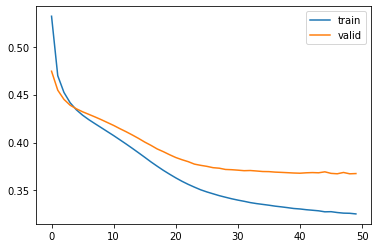

In [60]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

From the above plot, we observe that both curves - train and validation, are smooth. 

Let's check the other metrices.

In [61]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [62]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

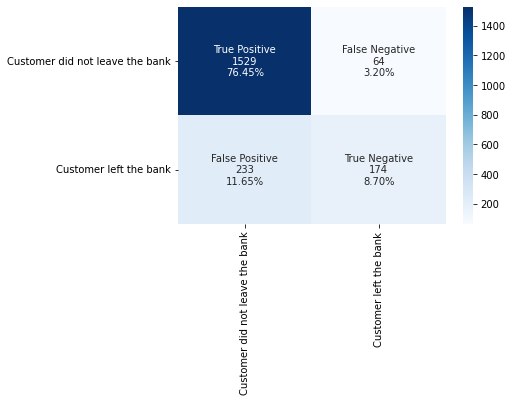

In [63]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, the 3.2% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve. 

In [64]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.43      0.54       407

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



As you can see, the above model has a good accuracy but a poor F1-score. This could be due to the imbalanced dataset. We observe that the False positive rates are also high, which should be considerably lower. 

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2

In [65]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [66]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [67]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [68]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4104 - accuracy: 0.8250 - val_loss: 0.3773 - val_accuracy: 0.8550
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3490 - accuracy: 0.8533 - val_loss: 0.3805 - val_accuracy: 0.8544
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.8572 - val_loss: 0.3933 - val_accuracy: 0.8487
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3239 - accuracy: 0.8637 - val_loss: 0.3888 - val_accuracy: 0.8600
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8662 - val_loss: 0.3920 - val_accuracy: 0.8544
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 0.8727 - val_loss: 0.3867 - val_accuracy: 0.8550
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8745 - val_loss: 0.3906 - val_accuracy: 0.8462
Epoch 

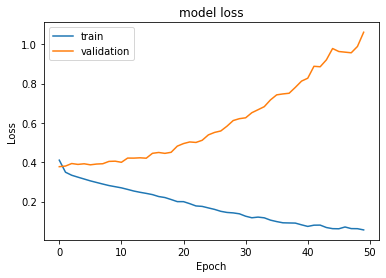

In [69]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, we can see smoother loss curves for train data and noise in the valoidation. Model seems to have overfitted on the training data because there is a significant difference in performance between train and validation.


Best Threshold=0.005321, G-Mean=0.713


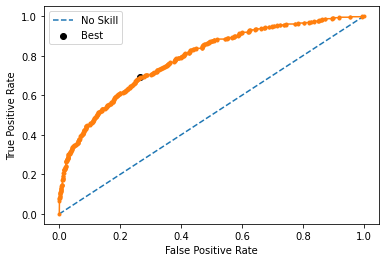

In [70]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [71]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

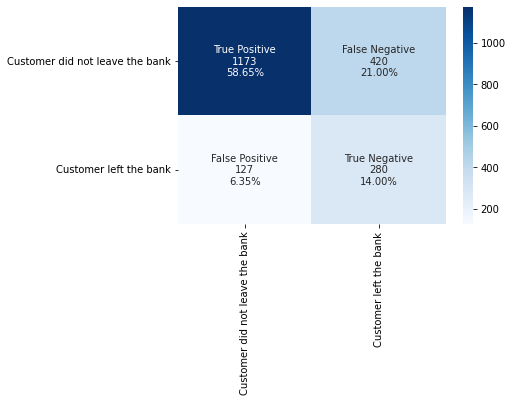

In [72]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [73]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1593
           1       0.40      0.69      0.51       407

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.73      0.75      2000



As the number of layers in the neural network has increased, we can see that the macro F1 score has decreased, and the False Negative percentage has increased. 

Now let's try to use the Batch Normalization technique and check to see if we can increase the F1 score. 

### Model 3

In [74]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [75]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [76]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [77]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [78]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4662 - accuracy: 0.7777 - val_loss: 0.4401 - val_accuracy: 0.8244
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.8498 - val_loss: 0.3889 - val_accuracy: 0.8413
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.8542 - val_loss: 0.3683 - val_accuracy: 0.8587
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.8592 - val_loss: 0.3689 - val_accuracy: 0.8556
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8623 - val_loss: 0.3696 - val_accuracy: 0.8569
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3146 - accuracy: 0.8677 - val_loss: 0.3771 - val_accuracy: 0.8550
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3112 - accuracy: 0.8687 - val_loss: 0.3790 - val_accuracy: 0.8544
Epoch 

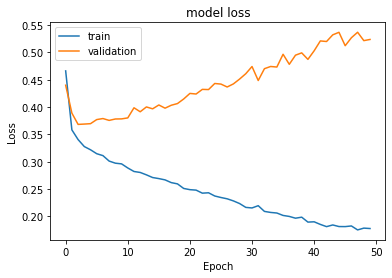

In [79]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Unfortunately, from the above plot we observe that there is a smoother loss curves for train data and noise in the valoidation. Model seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

Best Threshold=0.107847, G-Mean=0.733


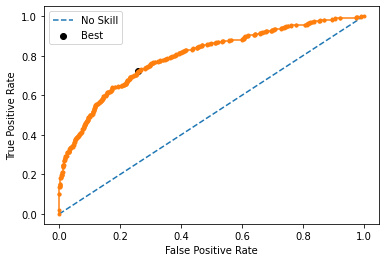

In [80]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [81]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

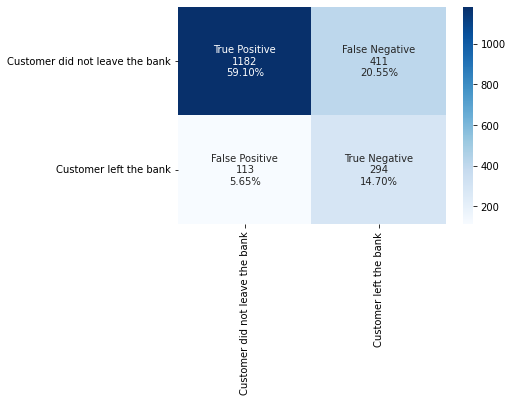

In [82]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [83]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1593
           1       0.42      0.72      0.53       407

    accuracy                           0.74      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.74      0.76      2000



The Train and Validation curves seem to show overfitting despite having a good F1 score and a low False Negative rate. 

Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate. 

### Model 4

In [84]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [85]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [86]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [87]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [88]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4685 - accuracy: 0.7950 - val_loss: 0.4177 - val_accuracy: 0.8381
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3919 - accuracy: 0.8388 - val_loss: 0.3694 - val_accuracy: 0.8581
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.8506 - val_loss: 0.3807 - val_accuracy: 0.8600
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.8516 - val_loss: 0.3726 - val_accuracy: 0.8619
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8539 - val_loss: 0.3739 - val_accuracy: 0.8606
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.8583 - val_loss: 0.3694 - val_accuracy: 0.8600
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3432 - accuracy: 0.8583 - val_loss: 0.3654 - val_accuracy: 0.8650
Epoch 

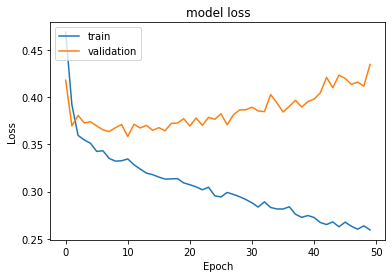

In [89]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, we can see smoother loss curves for train and valoidation. Model seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

Best Threshold=0.170627, G-Mean=0.754


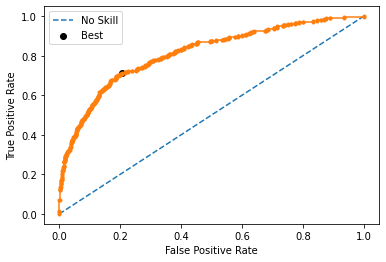

In [90]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [91]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

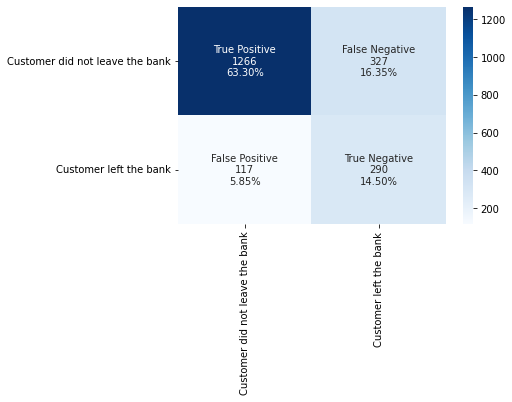

In [92]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [93]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.71      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.78      0.79      2000



The Dropout technique helped the model reduce the loss function of both train and validation. The F1 score also seems to be fine, with a decrease in the False Negative rate.

Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

### Model 5

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [94]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [95]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.



In [96]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [97]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4373 - accuracy: 0.8148 - val_loss: 0.3974 - val_accuracy: 0.8338
Best: 0.841500 using {'lr': 0.01, 'batch_size': 32}


The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [98]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [99]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4288 - accuracy: 0.8173 - val_loss: 0.4083 - val_accuracy: 0.8450
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8375 - val_loss: 0.3800 - val_accuracy: 0.8525
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.8423 - val_loss: 0.4123 - val_accuracy: 0.8444
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.8480 - val_loss: 0.3888 - val_accuracy: 0.8594
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8520 - val_loss: 0.3740 - val_accuracy: 0.8569
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3610 - accuracy: 0.8498 - val_loss: 0.3758 - val_accuracy: 0.8556
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8562 - val_loss: 0.3704 - val_accuracy: 0.8631
Epoch 

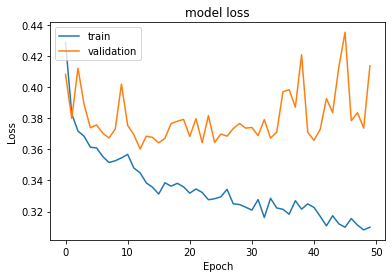

In [100]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the validation behavior of the model.

Best Threshold=0.192330, G-Mean=0.776


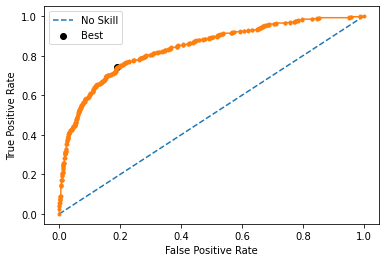

In [101]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [102]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

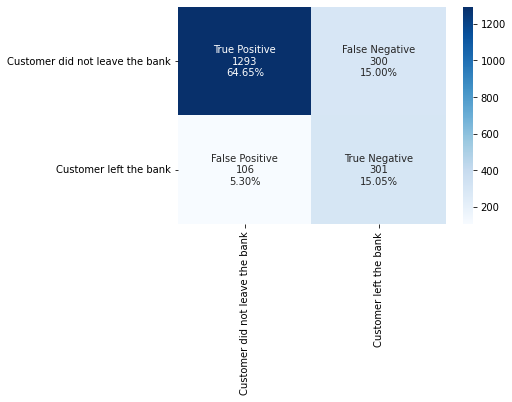

In [103]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [104]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



Hyperparameter tuning is used here to get a better F1 score, but the F1 score may differ each time. 

Other hyperparameters can also be tuned to get better performance on the metrics. 

Here, the F1 score of the model has increased in comparison to the previous best performance. 

Let's use the more exhaustive Grid Search CV and see if the F1 score increases. 

### Model 6

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [105]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [106]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**. 

You can also optimize the other hyperparameters as mentioned above.

In [107]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [108]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4373 - accuracy: 0.8148 - val_loss: 0.3974 - val_accuracy: 0.8338
Best: 0.838748 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 28.84820580482483


The best model has the following configuration: 

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [109]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [110]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4288 - accuracy: 0.8173 - val_loss: 0.4083 - val_accuracy: 0.8450
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8375 - val_loss: 0.3800 - val_accuracy: 0.8525
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.8423 - val_loss: 0.4123 - val_accuracy: 0.8444
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 0.8480 - val_loss: 0.3888 - val_accuracy: 0.8594
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8520 - val_loss: 0.3740 - val_accuracy: 0.8569
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8498 - val_loss: 0.3758 - val_accuracy: 0.8556
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8562 - val_loss: 0.3709 - val_accuracy: 0.8631
Epoch 

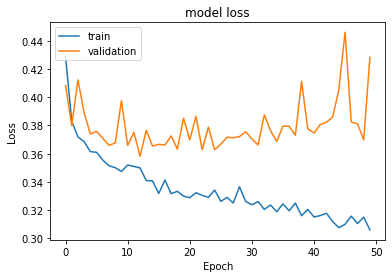

In [111]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both curves - train and validation, has noise.

Best Threshold=0.167552, G-Mean=0.775


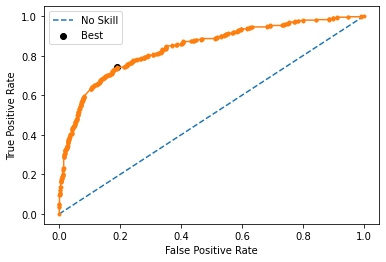

In [112]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [113]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

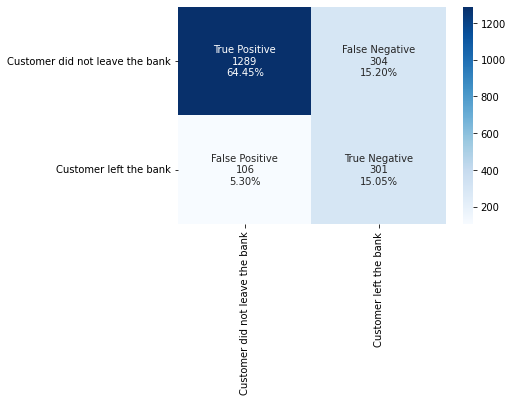

In [114]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [115]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



Hyperparameter tuning with Grid Search has been used here to get a better F1 score, but the F1 score might differ each time. 

Other hyperparameters can also be tuned to get better metrics. 

Here, the F1 score of the model, while less than in Randomized Search, is slightly higher than in Model 4 (the Dropout model).

### Dask

* There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure. 
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn. 

You may install the Dask library in Anaconda prompt using the below code:
* !pip install dask-ml --user

In [116]:
# Try below code to install dask in Google Colab
!pip install dask-ml 

In [117]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

Try to run the code twice if you encounter any error while improting Dask

* Dask is the same as regular Grid Search in its functioning. 
* We just have to change the function from GridSearchCV to DaskGridSearchCV.

In [118]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [119]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [120]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

200/200 [==============================] - 2s 6ms/step - loss: 0.4375 - accuracy: 0.8136 - val_loss: 0.3945 - val_accuracy: 0.8375
Best: 0.837250 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 62.583648920059204


Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

* The dimension of the dataset should be large.
* Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.

Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

We can also use another optimization technique - Keras Tuner.

In [121]:
## Install Keras Tuner
!pip install keras-tuner 

### Keras Tuner

In [122]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [123]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [124]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.


In [125]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Oracle from existing project ./Job_/oracle.json
INFO:tensorflow:Reloading Tuner from ./Job_/tuner0.json


In [126]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [127]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [128]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8735416531562805
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8714583516120911
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8666666547457377
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8660416603088379
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
l

### Model 7

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [129]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [130]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [131]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [132]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [133]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4010 - accuracy: 0.8327 - val_loss: 0.3957 - val_accuracy: 0.8381
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.8523 - val_loss: 0.3781 - val_accuracy: 0.8481
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3336 - accuracy: 0.8605 - val_loss: 0.4014 - val_accuracy: 0.8450
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3232 - accuracy: 0.8623 - val_loss: 0.4018 - val_accuracy: 0.8512
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3079 - accuracy: 0.8687 - val_loss: 0.3906 - val_accuracy: 0.8487
Epoch 6/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3005 - accuracy: 0.8728 - val_loss: 0.3940 - val_accuracy: 0.8519
Epoch 7/50
100/100 [==============================] - 1s 6ms/step - loss: 0.2880 - accuracy: 0.8756 - val_loss: 0.4161 - val_accuracy: 0.8413
Epoch 

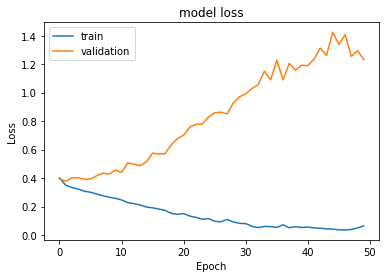

In [134]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the train and validation curves are smooth. Model seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

Best Threshold=0.030214, G-Mean=0.708


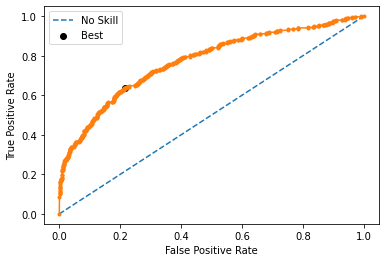

In [135]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [136]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

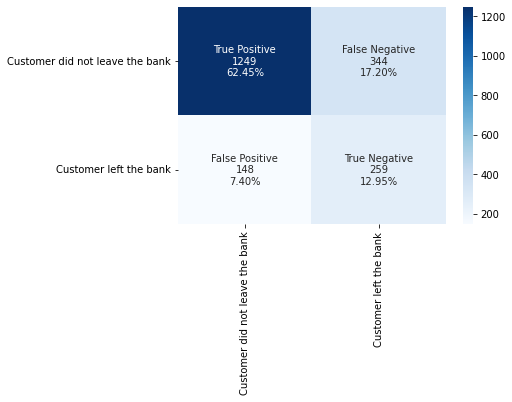

In [137]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [138]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.89      0.78      0.84      1593
           1       0.43      0.64      0.51       407

    accuracy                           0.75      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.80      0.75      0.77      2000



* After using the suggested hyperparameters from Keras Tuner, the F1 score been decreased, and the False Negative rate is higher in comparison to the previous optimization technique model.

* Further, you can add Batch Normalization and Dropout to the model and check the F1 score. 

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [139]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [140]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [141]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [142]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

INFO:tensorflow:Reloading Oracle from existing project ./Job_Switch/oracle.json
INFO:tensorflow:Reloading Tuner from ./Job_Switch/tuner0.json


In [143]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [144]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [145]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.7956567207972208
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7785190939903259
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7708006302515665
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.7375719547271729
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1

In [146]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [147]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [148]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [149]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 4s 12ms/step - loss: 0.4794 - accuracy: 0.7642 - val_loss: 0.5688 - val_accuracy: 0.6927
Epoch 2/50
160/160 [==============================] - 1s 8ms/step - loss: 0.4058 - accuracy: 0.8104 - val_loss: 0.4236 - val_accuracy: 0.7802
Epoch 3/50
160/160 [==============================] - 2s 9ms/step - loss: 0.3772 - accuracy: 0.8272 - val_loss: 0.4312 - val_accuracy: 0.7786
Epoch 4/50
160/160 [==============================] - 2s 11ms/step - loss: 0.3613 - accuracy: 0.8361 - val_loss: 0.4686 - val_accuracy: 0.7641
Epoch 5/50
160/160 [==============================] - 2s 10ms/step - loss: 0.3324 - accuracy: 0.8496 - val_loss: 0.5406 - val_accuracy: 0.7221
Epoch 6/50
160/160 [==============================] - 1s 9ms/step - loss: 0.3150 - accuracy: 0.8600 - val_loss: 0.4832 - val_accuracy: 0.7783
Epoch 7/50
160/160 [==============================] - 1s 9ms/step - loss: 0.2970 - accuracy: 0.8713 - val_loss: 0.3832 - val_accuracy: 0.8159
Epo

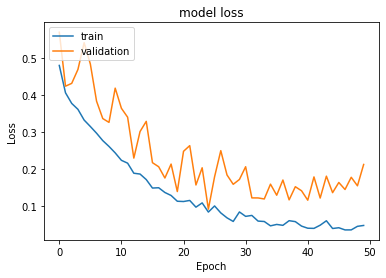

In [150]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model.

Best Threshold=0.004895, G-Mean=0.696


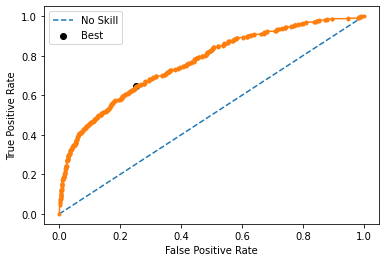

In [151]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [152]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

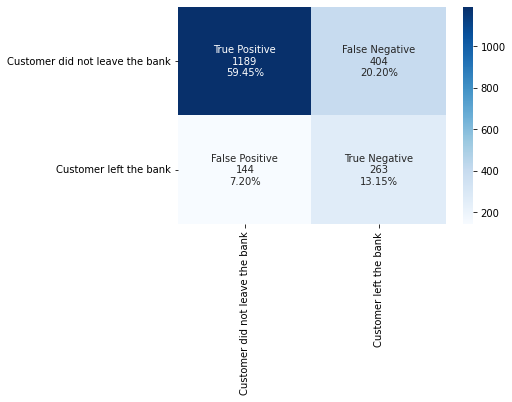

In [153]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [154]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1593
           1       0.39      0.65      0.49       407

    accuracy                           0.73      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.73      0.75      2000



After applying the SMOTE technique to the data, the F1 score decreased, and the False Negative rate increased. 

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [155]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [156]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [157]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [158]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4373 - accuracy: 0.8148 - val_loss: 0.3974 - val_accuracy: 0.8338


In [159]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.843999 using {'batch_size': 32, 'lr': 0.01}


In [160]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [161]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 3s 8ms/step - loss: 0.5146 - accuracy: 0.7455 - val_loss: 0.5805 - val_accuracy: 0.6900
Epoch 2/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4798 - accuracy: 0.7832 - val_loss: 0.7261 - val_accuracy: 0.5549
Epoch 3/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4573 - accuracy: 0.7877 - val_loss: 0.5074 - val_accuracy: 0.7159
Epoch 4/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4582 - accuracy: 0.7906 - val_loss: 0.6446 - val_accuracy: 0.6142
Epoch 5/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4554 - accuracy: 0.7958 - val_loss: 0.5754 - val_accuracy: 0.6601
Epoch 6/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4432 - accuracy: 0.7976 - val_loss: 0.6451 - val_accuracy: 0.6597
Epoch 7/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4451 - accuracy: 0.8009 - val_loss: 0.5533 - val_accuracy: 0.6354
Epoch 

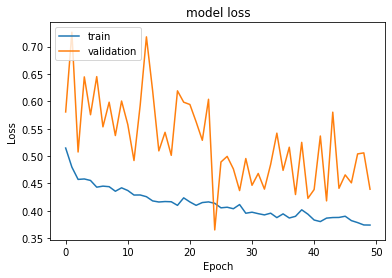

In [162]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model. 

Grid Search CV also does not seem to work that well on the SMOTE data.

Best Threshold=0.386210, G-Mean=0.758


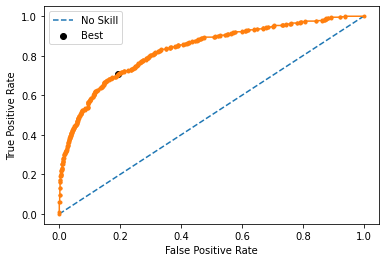

In [163]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [164]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

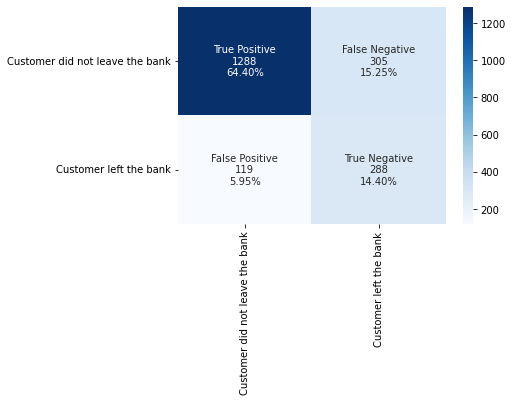

In [165]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [166]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.71      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



Oversampling using SMOTE did not help improve the F1 score. 

In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.

So, our final model here can be **Model 5**, which uses the Random Search CV technique and works on the imbalanced dataset.



### Business Recommendations

* Bank can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether a customer is likely to leave the bank or not, and this process seems to be easier and more time-efficient than other methods.
* Customers with more Products are leaving bank to get better product from other bank.
* Aged customers are leaving to get better services.
* Customers with zero balance leaving the Bank.